In [116]:
import pandas as pd

In [117]:
import numpy as np

In [118]:
import matplotlib.pyplot as plt 

In [119]:
import seaborn as sns

In [120]:
import plotly.express as px

In [121]:
from plotly.subplots import make_subplots

In [122]:
from datetime import datetime

In [123]:
#Import first dataset
covid_df = pd.read_csv("C:/Users/fokst/OneDrive/Desktop/Scotland_COVID19_Python_Data_Analysis/covid-19-totals-scotland.csv")

In [124]:
#Return first 10 rows
covid_df.head(10)

,Date,Tests,ConfirmedCases,Deaths
0,2020-01-24,2,0,0.0
1,2020-01-25,5,0,0.0
2,2020-01-26,6,0,0.0
3,2020-01-27,7,0,0.0
4,2020-01-28,11,0,0.0
5,2020-01-29,11,0,0.0
6,2020-01-30,16,0,0.0
7,2020-01-31,16,0,0.0
8,2020-02-01,16,0,0.0
9,2020-02-02,16,0,0.0


In [125]:
#allows us to learn the shape of object types of our data
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            191 non-null    object 
 1   Tests           191 non-null    int64  
 2   ConfirmedCases  191 non-null    int64  
 3   Deaths          190 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.1+ KB


In [126]:
#statistics summary data for numerical columns in the dataframe
covid_df.describe()

,Tests,ConfirmedCases,Deaths
count,191.000000,191.000000,190.000000
mean,101935.015707,9188.753927,1240.405263
std,116572.586704,7700.154638,1101.473251
min,2.000000,0.000000,0.000000
25%,2604.000000,48.000000,0.000000
50%,51499.000000,10721.000000,1297.000000
75%,174298.500000,16892.500000,2447.750000
max,363239.000000,18645.000000,2491.000000


In [127]:
#Import second dataset
vaccine_df = pd.read_csv("C:/Users/fokst/OneDrive/Desktop/Scotland_COVID19_Python_Data_Analysis/Vaccine Data 1.csv")

In [128]:
vaccine_df.head(7)

,_id,Date,Country,Product,Population,Dose,NumberVaccinated,PercentCoverage,CumulativeNumberVaccinated,CumulativePercentCoverage,AgeBand
0,1,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 1,14,NaN,14,NaN,All vaccinations
1,2,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 2,0,NaN,0,NaN,All vaccinations
2,3,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 3,0,NaN,0,NaN,All vaccinations
3,4,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 1,0,NaN,0,NaN,All vaccinations
4,5,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 2,0,NaN,0,NaN,All vaccinations
5,6,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 3,0,NaN,0,NaN,All vaccinations
6,7,2020-12-08,S92000003,Pfizer BioNTech (Comirnaty),NaN,Dose 1,1934,NaN,1934,NaN,All vaccinations


In [129]:
#Generate active cases
covid_df["Active Cases"] = covid_df["ConfirmedCases"] + covid_df["Deaths"]
covid_df.tail()

,Date,Tests,ConfirmedCases,Deaths,Active Cases
186,2020-07-28,349223,18558,2491.0,21049.0
187,2020-07-29,352494,18580,2491.0,21071.0
188,2020-07-30,355898,18597,2491.0,21088.0
189,2020-07-31,359537,18627,2491.0,21118.0
190,2020-08-01,363239,18645,NaN,NaN


In [130]:
#create summary using pivot table
summary = pd.pivot_table(covid_df, values = ["ConfirmedCases", "Deaths", "Tests"], index = "Date", aggfunc = max)

In [198]:
#mortality rate
summary["Mortality Rate"] = summary["Deaths"]*100/summary["ConfirmedCases"]

In [151]:
summary = summary.sort_values(by = "ConfirmedCases", ascending = False)

In [152]:
#cmap = colour map 
summary.style.background_gradient(cmap = "cubehelix" )

,ConfirmedCases,Deaths,Tests,Mortality Rate
Date,,,,
2020-08-01,18645,nan,363239,nan
2020-07-31,18627,2491.000000,359537,13.373061
2020-07-30,18597,2491.000000,355898,13.394634
2020-07-29,18580,2491.000000,352494,13.406889
2020-07-28,18558,2491.000000,349223,13.422783
2020-07-27,18554,2491.000000,346255,13.425676
2020-07-26,18551,2491.000000,343987,13.427848
2020-07-25,18547,2491.000000,341551,13.430744
2020-07-24,18520,2491.000000,337519,13.450324


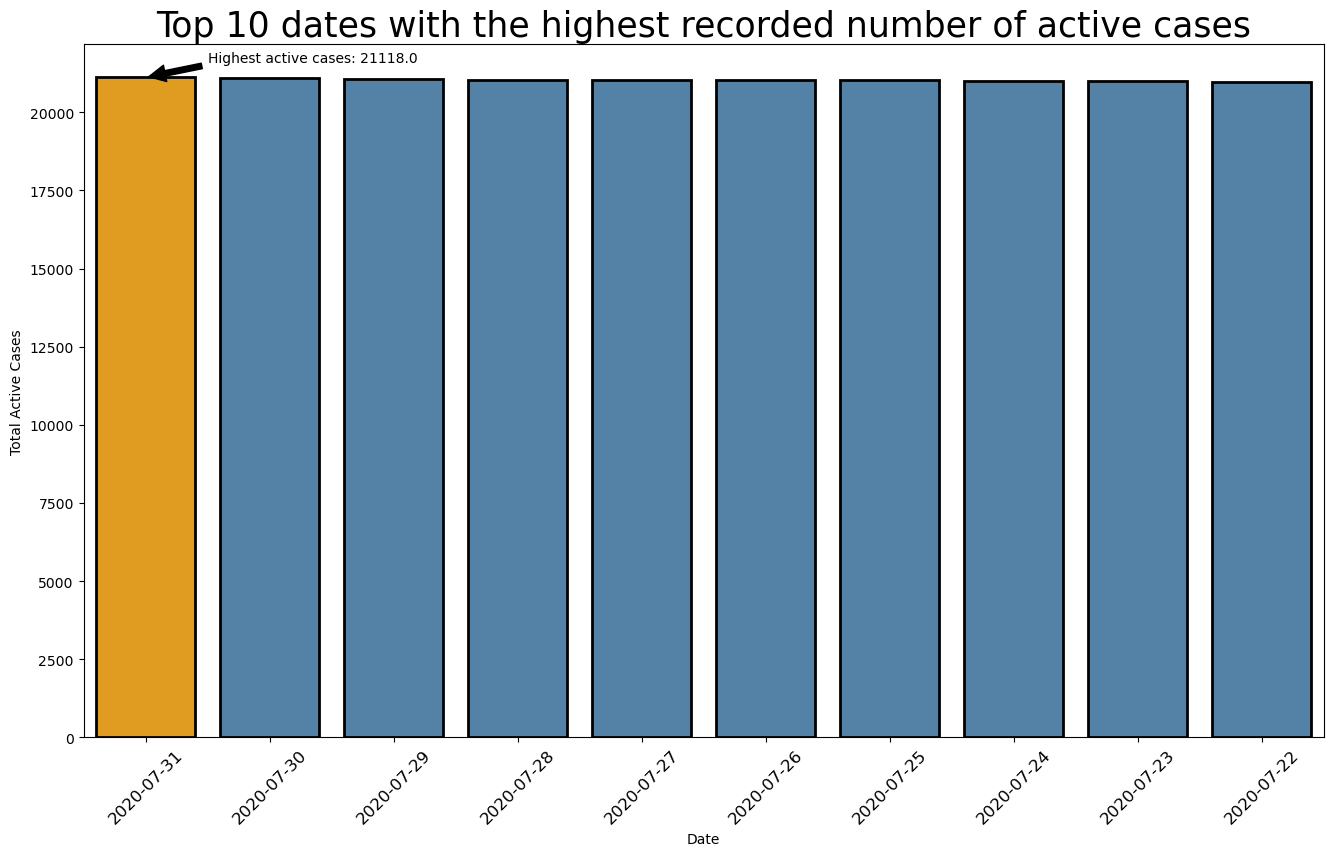

In [212]:
#Top 10 dates with the highest recorded number of active cases

max_value = top_10_active_cases.iloc[:10]["Active Cases"].max()
max_index = top_10_active_cases.iloc[:10]["Active Cases"].idxmax()

colors = ["orange" if i == top_10_active_cases.index.get_loc(max_index) else "steelblue" 
          for i in range(len(top_10_active_cases.iloc[:10]))]


top_10_active_cases = covid_df.groupby(by = "Date").max()[["Active Cases"]].sort_values(by = ["Active Cases"], ascending = False).reset_index()

fig = plt.figure(figsize = (16,9))

plt.title("Top 10 dates with the highest recorded number of active cases", size = 25)

ax = sns.barplot(data=top_10_active_cases.iloc[:10],y="Active Cases",x="Date",palette=colors,linewidth=2,edgecolor="black")

plt.xticks(rotation=45, fontsize=12)
plt.annotate(f'Highest active cases: {max_value}', xy=(top_10_active_cases.index.get_loc(max_index), max_value), xytext=(top_10_active_cases.index.get_loc(max_index) + 0.5, max_value + 500), arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel("Date")
plt.ylabel("Total Active Cases")
plt.show()

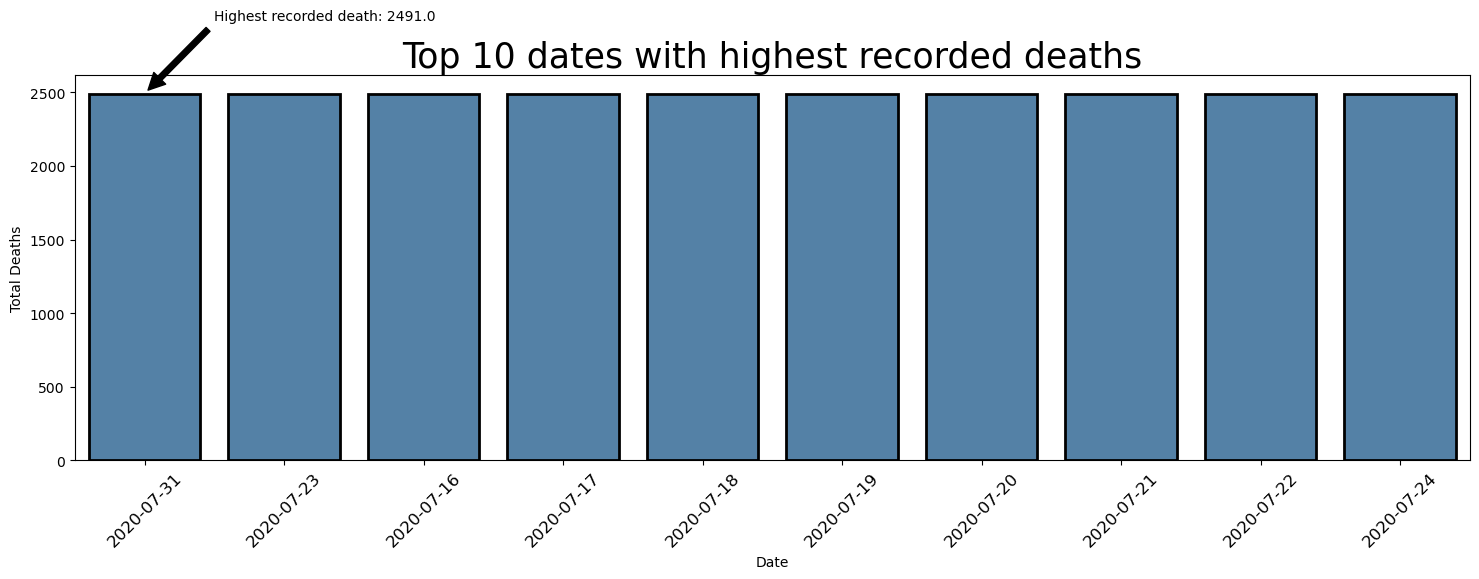

In [218]:
#Top 10 dates with highest recorded deaths

max_value = top_10_deaths.iloc[:10]["Deaths"].max()
max_index = top_10_deaths.iloc[:10]["Deaths"].idxmax()

colors = ["steelblue"]

top_10_deaths = covid_df.groupby(by = "Date").max()[["Deaths"]].sort_values(by = "Deaths", ascending = False).reset_index()

fig = plt.figure(figsize=(18,5))

plt.title("Top 10 dates with highest recorded deaths", size = 25)

ax = sns.barplot(data = top_10_deaths.iloc[:10], y = "Deaths", x = "Date", palette=colors, linewidth = 2, edgecolor = "black")

plt.xticks(rotation=45, fontsize=12)
plt.annotate(f'Highest recorded death: {max_value}', xy=(top_10_deaths.index.get_loc(max_index), max_value), xytext=(top_10_deaths.index.get_loc(max_index) + 0.5, max_value + 500), arrowprops=dict(facecolor='black', shrink=0.05))


plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.show()

Text(0.5, 1.0, 'Top 5 Active Cases of Covid in Scotland')

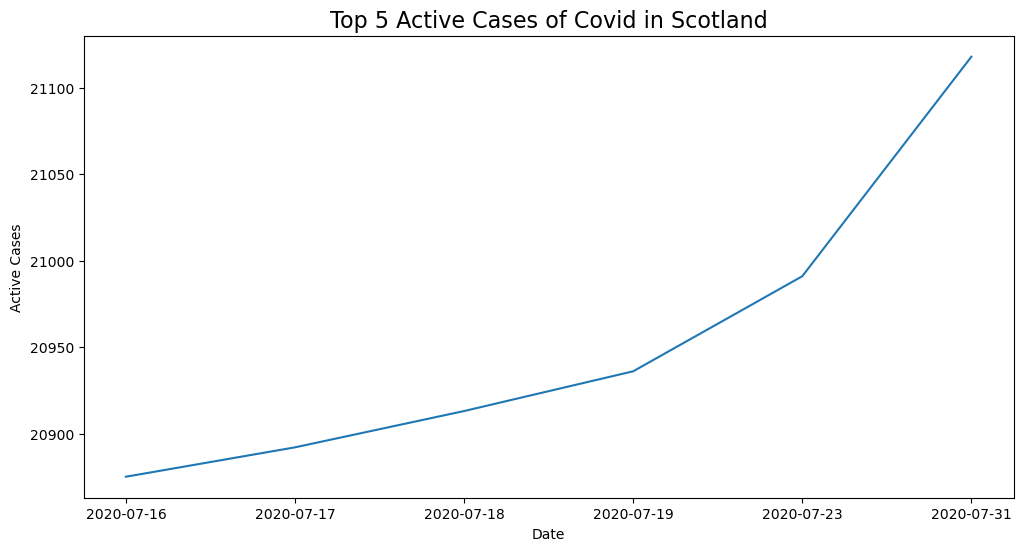

In [140]:
#Growth trend of the top 5 active cases of Covid in Scotland

fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = covid_df[covid_df["Date"].isin(["2020-07-31", "2020-07-23", "2020-07-16", "2020-07-17", "2020-07-18", "2020-07-19"])], x = "Date", y = "Active Cases")

ax.set_title("Top 5 Active Cases of Covid in Scotland", size = 16)

In [141]:
vaccine_df.head()

,_id,Date,Country,Product,Population,Dose,NumberVaccinated,PercentCoverage,CumulativeNumberVaccinated,CumulativePercentCoverage,AgeBand
0,1,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 1,14,NaN,14,NaN,All vaccinations
1,2,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 2,0,NaN,0,NaN,All vaccinations
2,3,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 3,0,NaN,0,NaN,All vaccinations
3,4,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 1,0,NaN,0,NaN,All vaccinations
4,5,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 2,0,NaN,0,NaN,All vaccinations


In [142]:
#Incorporating rename function
vaccine_df.rename(columns = {"Date" : "Vaccine Date"}, inplace = True)
vaccine_df.head(10)

,_id,Vaccine Date,Country,Product,Population,Dose,NumberVaccinated,PercentCoverage,CumulativeNumberVaccinated,CumulativePercentCoverage,AgeBand
0,1,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 1,14,NaN,14,NaN,All vaccinations
1,2,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 2,0,NaN,0,NaN,All vaccinations
2,3,2020-12-08,S92000003,AstraZeneca (Vaxzevria),NaN,Dose 3,0,NaN,0,NaN,All vaccinations
3,4,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 1,0,NaN,0,NaN,All vaccinations
4,5,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 2,0,NaN,0,NaN,All vaccinations
5,6,2020-12-08,S92000003,Moderna (Spikevax),NaN,Dose 3,0,NaN,0,NaN,All vaccinations
6,7,2020-12-08,S92000003,Pfizer BioNTech (Comirnaty),NaN,Dose 1,1934,NaN,1934,NaN,All vaccinations
7,8,2020-12-08,S92000003,Pfizer BioNTech (Comirnaty),NaN,Dose 2,0,NaN,0,NaN,All vaccinations
8,9,2020-12-08,S92000003,Pfizer BioNTech (Comirnaty),NaN,Dose 3,0,NaN,0,NaN,All vaccinations
9,10,2020-12-08,S92000003,Total,NaN,Dose 1,1948,NaN,1948,NaN,All vaccinations


In [143]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         504 non-null    int64  
 1   Vaccine Date                504 non-null    object 
 2   Country                     504 non-null    object 
 3   Product                     504 non-null    object 
 4   Population                  216 non-null    float64
 5   Dose                        504 non-null    object 
 6   NumberVaccinated            504 non-null    int64  
 7   PercentCoverage             216 non-null    float64
 8   CumulativeNumberVaccinated  504 non-null    int64  
 9   CumulativePercentCoverage   216 non-null    float64
 10  AgeBand                     504 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 43.4+ KB


In [144]:
#Checks which values are null/not given. 0=notnull, have value=null
vaccine_df.isnull().sum()

_id                             0
Vaccine Date                    0
Country                         0
Product                         0
Population                    288
Dose                            0
NumberVaccinated                0
PercentCoverage               288
CumulativeNumberVaccinated      0
CumulativePercentCoverage     288
AgeBand                         0
dtype: int64

In [145]:
#Drop/remove columns
vaccination = vaccine_df.drop(columns = ["Country", "_id", "PercentCoverage", "CumulativeNumberVaccinated", "CumulativePercentCoverage"], axis = 1)
vaccination.head(10)

,Vaccine Date,Product,Population,Dose,NumberVaccinated,AgeBand
0,2020-12-08,AstraZeneca (Vaxzevria),NaN,Dose 1,14,All vaccinations
1,2020-12-08,AstraZeneca (Vaxzevria),NaN,Dose 2,0,All vaccinations
2,2020-12-08,AstraZeneca (Vaxzevria),NaN,Dose 3,0,All vaccinations
3,2020-12-08,Moderna (Spikevax),NaN,Dose 1,0,All vaccinations
4,2020-12-08,Moderna (Spikevax),NaN,Dose 2,0,All vaccinations
5,2020-12-08,Moderna (Spikevax),NaN,Dose 3,0,All vaccinations
6,2020-12-08,Pfizer BioNTech (Comirnaty),NaN,Dose 1,1934,All vaccinations
7,2020-12-08,Pfizer BioNTech (Comirnaty),NaN,Dose 2,0,All vaccinations
8,2020-12-08,Pfizer BioNTech (Comirnaty),NaN,Dose 3,0,All vaccinations
9,2020-12-08,Total,NaN,Dose 1,1948,All vaccinations


In [146]:
#Dates with the most number of vaccination
max_vac = vaccination.groupby("Vaccine Date")["NumberVaccinated"].sum().to_frame("NumberVaccinated")
max_vac = max_vac.sort_values("NumberVaccinated", ascending = False)[:5]
max_vac

,NumberVaccinated
Vaccine Date,
2020-12-22,56100
2020-12-23,48400
2020-12-21,45460
2020-12-18,40311
2020-12-30,36992


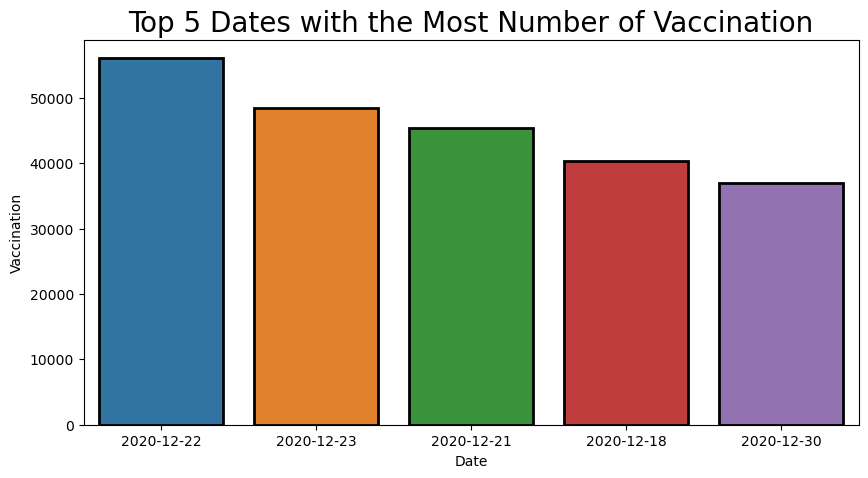

In [155]:
#Plot, Axis Data, and Figure objects combined
fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Dates with the Most Number of Vaccination", size = 20)
ax = sns.barplot(data = max_vac.iloc[:10], y = max_vac.NumberVaccinated, x = max_vac.index, linewidth = 2, edgecolor = "black")
plt.xlabel("Date")
plt.ylabel("Vaccination")
plt.show()

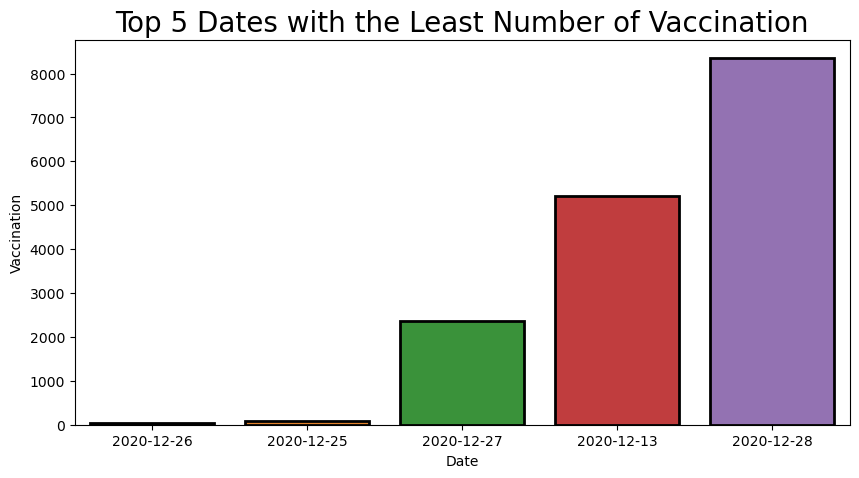

In [148]:
#Dates with the least number of vaccination
min_vac = vaccination.groupby("Vaccine Date")["NumberVaccinated"].sum().to_frame("NumberVaccinated")
min_vac = min_vac.sort_values("NumberVaccinated", ascending = True)[:5]
min_vac

fig = plt.figure(figsize=(10,5))
plt.title("Top 5 Dates with the Least Number of Vaccination", size = 20)
ax = sns.barplot(data = min_vac.iloc[:10], y = min_vac.NumberVaccinated, x = min_vac.index, linewidth = 2, edgecolor = "black")
plt.xlabel("Date")
plt.ylabel("Vaccination")
plt.show()